In [40]:
# !pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
# !pip3 install torch torchaudio torchvision torchtext torchdata

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [56]:
class Model(nn.Module):
   def __init__(self,in_fut=4,h1=8,h2=8,h3=8,out_fut=3):
     super().__init__()
     self.fc1=nn.Linear(in_fut,h1)
     self.fc2=nn.Linear(h1,h2)
     self.fc3=nn.Linear(h2,h3)
     self.out=nn.Linear(h3,out_fut)

   def forward(self, x):
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = F.relu(self.fc3(x))
     x = self.out(x)
     return x


In [69]:
torch.manual_seed(32)

model= Model()

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [59]:
df=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [60]:
df['variety']=df['variety'].replace('Setosa',0.0)
df['variety']=df['variety'].replace('Versicolor',1.0)
df['variety']=df['variety'].replace('Virginica',2.0)
df

/tmp/ipython-input-60-591638934.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety']=df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [72]:
x=df.drop('variety',axis=1).values
y=df['variety'].values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [74]:
x_test=torch.FloatTensor(x_test)
x_train=torch.FloatTensor(x_train)
y_test=torch.LongTensor(y_test)
y_train=torch.LongTensor(y_train)

In [75]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [91]:
epochs=100
losses=[]

for i in range(epochs):
  y_pred=model.forward(x_train)
  loss=criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if(i%10==0):
    print(f'Epoch:{i} Loss:{loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()






Epoch:0 Loss:0.04566793516278267
Epoch:10 Loss:0.046269312500953674
Epoch:20 Loss:0.04561367258429527
Epoch:30 Loss:0.045440923422575
Epoch:40 Loss:0.04544804245233536
Epoch:50 Loss:0.045394934713840485
Epoch:60 Loss:0.04530017450451851
Epoch:70 Loss:0.045228030532598495
Epoch:80 Loss:0.04518142715096474
Epoch:90 Loss:0.04513658955693245


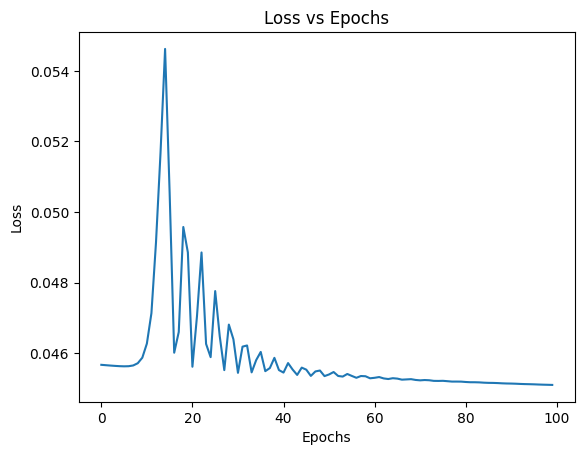

In [92]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [93]:
with torch.no_grad():
  y_evl=model.forward(x_test)
  loss=criterion(y_evl,y_test)

print(loss)

tensor(0.0246)


In [94]:
correct=0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val=model.forward(data)

    print(f'{i+1}.) {y_val}. \t{y_test[i]} \t {y_val.argmax().item()}')

    if y_val.argmax().item()==y_test[i]:
      correct+=1

print(f'total correct are {correct}')

1.) tensor([-6.0673,  6.4738, -1.1493]). 	1 	 1
2.) tensor([  8.7997,  -2.9680, -12.0975]). 	0 	 0
3.) tensor([  7.9448,  -1.9689, -11.8547]). 	0 	 0
4.) tensor([-6.7628,  5.7480, -0.3941]). 	1 	 1
5.) tensor([-8.2444, -0.0307,  3.5976]). 	2 	 2
6.) tensor([-10.2940,  -1.7048,   5.5614]). 	2 	 2
7.) tensor([  7.4916,  -1.5332, -11.6122]). 	0 	 0
8.) tensor([  8.1033,  -2.1502, -11.9044]). 	0 	 0
9.) tensor([-6.2833,  6.5609, -1.0908]). 	1 	 1
10.) tensor([  8.3853,  -2.3056, -12.2043]). 	0 	 0
11.) tensor([-7.0670,  6.1626, -0.4760]). 	1 	 1
12.) tensor([-9.1403, -3.5742,  6.0389]). 	2 	 2
13.) tensor([-3.2071,  8.4793, -4.3936]). 	1 	 1
14.) tensor([-3.8608,  9.7192, -4.6392]). 	1 	 1
15.) tensor([-8.5926, -0.9722,  4.3011]). 	2 	 2
16.) tensor([-8.4083, -3.2232,  5.4766]). 	2 	 2
17.) tensor([-6.2683,  5.2549, -0.3630]). 	1 	 1
18.) tensor([-7.9067,  0.8766,  2.9185]). 	2 	 2
19.) tensor([-4.2255,  9.4126, -3.9890]). 	1 	 1
20.) tensor([  8.9310,  -2.5916, -12.8053]). 	0 	 0
21.) ten